In [1]:
#library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#models

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#metrix representation

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score , classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


In [2]:
# loading the Data

data = pd.read_csv("kidney_disease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Data Set Information:

### We use the following representation to collect the dataset
- age - age
- bp - blood pressure ( 40 to 180 )
- sg - specific gravity ( between 1.002 and 1.035 )
- al - albumin ( between 1 to 5 )
- su - sugar ( between 1 to 5 )
- rbc - red blood cells (normal,abnormal)
- pc - pus cell (normal,abnormal)
- pcc - pus cell clumps (present,notpresent)
- ba - bacteria (present,notpresent)
- bgr - blood glucose random (<140 mg/dL to >200 mg/dL)
- bu - blood urea ( 6 - 23 mgs/dl ) 
- sc - serum creatinine ( 0.4 to 76 ) 
- sod - sodium ( 4 to 163 )
- pot - potassium ( 2.5 to 47 )
- hemo - hemoglobin (3.1 to 17.8)
- pcv - packed cell volume ( 9 to 54 ) 
- wc - white blood cell count ( 2200 to 26400 )
- rc - red blood cell count ( 2.1 to 8 )
- htn - hypertension (yes,no)
- dm - diabetes mellitus (yes,no)
- cad - coronary artery disease (yes,no)
- appet - appetite (good,poor)
- pe - pedal edema (yes,no)
- ane - anemia (yes,no)
- class - class (ckd,notckd)



## Attribute Information:

### ( 11 numeric ,14 nominal)

- 1.Age(numerical) = age in years

- 2.Blood Pressure(numerical) = bp in mm/Hg

- 3.Specific Gravity(nominal) = sg - (1.005,1.010,1.015,1.020,1.025)

- 4.Albumin(nominal) = al - (0,1,2,3,4,5)

- 5.Sugar(nominal) = su - (0,1,2,3,4,5)

- 6.Red Blood Cells(nominal) = rbc - (normal,abnormal)

- 7.Pus Cell (nominal) = pc - (normal,abnormal)

- 8.Pus Cell clumps(nominal) = pcc - (present,notpresent)

- 9.Bacteria(nominal) = ba - (present,notpresent)

- 10.Blood Glucose Random(numerical) =  <140 mg/dL to >200 mg/dL 

- 11.Blood Urea(numerical) = bu in mgs/dl

- 12.Serum Creatinine(numerical) = sc in mgs/dl

- 13.Sodium(numerical) = sod in mEq/L

- 14.Potassium(numerical) = pot in mEq/L

- 15.Hemoglobin(numerical) = hemo in gms

- 16.Packed Cell Volume(numerical)

- 17.White Blood Cell Count(numerical) = wc in cells/cumm

- 18.Red Blood Cell Count(numerical) = rc in millions/cmm

- 19.Hypertension(nominal) = htn - (yes,no)

- 20.Diabetes Mellitus(nominal) = dm - (yes,no)

- 21.Coronary Artery Disease(nominal) = cad - (yes,no)

- 22.Appetite(nominal) = appet - (good,poor)

- 23.Pedal Edema(nominal) = pe - (yes,no)

- 24.Anemia(nominal) = ane - (yes,no)

- 25.Class (nominal) = class - (ckd,notckd)- 

In [4]:
# Dropping the not necessary column

data = data.drop(columns=['id'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [6]:
#Finding the Unique Values 

data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [7]:
data['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [8]:
data['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6', '2.1', '5.6', '2.3', '2.9', '2.7',
       '8', '3.3', '3', '2.4', '4.8', '\t?', '5.4', '6.1', '6.2', '6.3',
       '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9', '6.5'],
      dtype=object)

In [9]:
data[['pcv','rc']] = data[['pcv','rc']].replace(to_replace = {'\t?':1.0})
data[['wc']] = data[['wc']].replace(to_replace = {'\t6200':6200,'\t8400':8400,'\t?':1.0})

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [10]:
#checking the null values 
data.isna().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Mean — When the data has no outliers. Mean is the average value. Mean will be affected by outliers.

Median — When the data has more outliers, it's best to replace them with the median value. Median is the middle value.

Mode — Most common value.

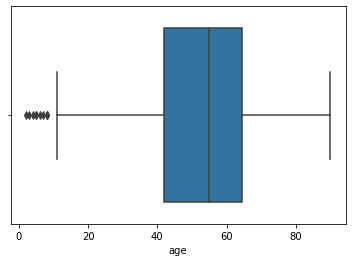

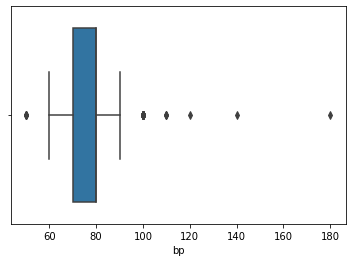

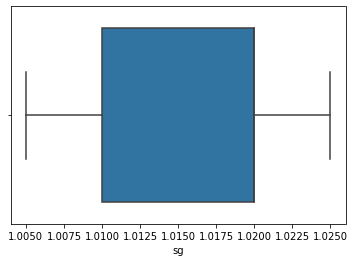

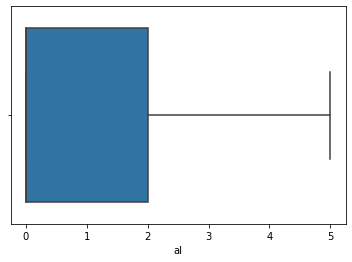

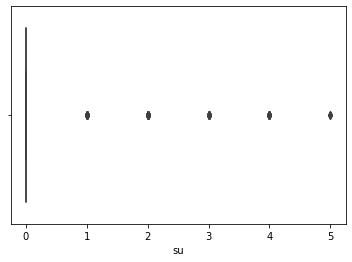

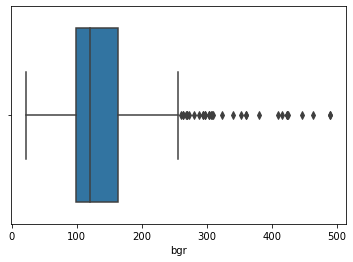

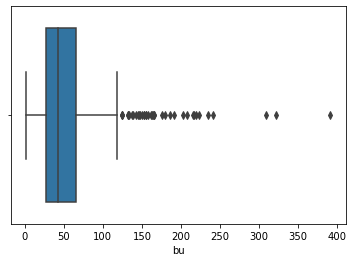

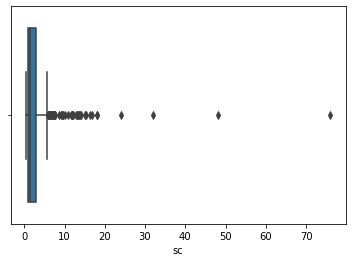

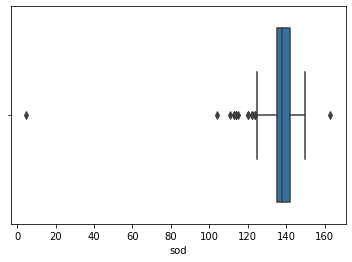

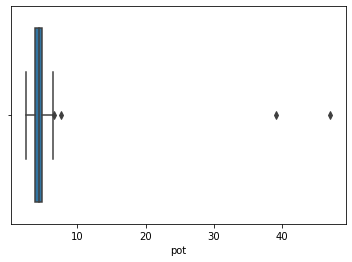

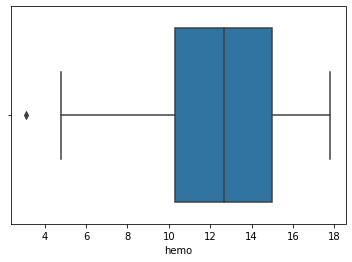

In [12]:
list = ['age', 'bp', 'sg', 'al', 'su',  'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo']
for i in list:
    sns.boxplot(x=data[i])
    plt.show()

In [13]:
def cln(col, val):
    if val == 0:
        data[col] = data[col].fillna(data[col].mean())
    elif val == 1:
        data[col] = data[col].fillna(data[col].median())
    elif val == 2:
        data[col] = data[col].fillna(data[col].mode()[0])
        
    

In [14]:
cln("age", 0)
cln("hemo", 0)
cln("sg", 0)
cln("al", 0)
cln("sod", 0)

list_value = ["su","bgr", "bu", "sc","bp","pot"]
for i in list_value:
    cln(i, 1)

list_val = [ 'rbc', 'pc', 'pcc', 'ba',  'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification']
for i in list_val:
    cln(i, 2)

In [15]:
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [16]:
data["age"].unique()

array([48.        ,  7.        , 62.        , 51.        , 60.        ,
       68.        , 24.        , 52.        , 53.        , 50.        ,
       63.        , 40.        , 47.        , 61.        , 21.        ,
       42.        , 75.        , 69.        , 51.48337596, 73.        ,
       70.        , 65.        , 76.        , 72.        , 82.        ,
       46.        , 45.        , 35.        , 54.        , 11.        ,
       59.        , 67.        , 15.        , 55.        , 44.        ,
       26.        , 64.        , 56.        ,  5.        , 74.        ,
       38.        , 58.        , 71.        , 34.        , 17.        ,
       12.        , 43.        , 41.        , 57.        ,  8.        ,
       39.        , 66.        , 81.        , 14.        , 27.        ,
       83.        , 30.        ,  4.        ,  3.        ,  6.        ,
       32.        , 80.        , 49.        , 90.        , 78.        ,
       19.        ,  2.        , 33.        , 36.        , 37.  

**EDA**

In [17]:
def plot_pie(column, title="All"):
    fig,axs = plt.subplots(1,1)
    data1 = data[column].value_counts()
    plt.pie(data1,autopct='%1.2f%%',labels=data1.index)
    plt.title(title)
    plt.show()
    
def plot_bar(column, sort=False, title="all"):
    if sort:
        data_all = data[column].value_counts().sort_index()
    else:
        data_all = data[column].value_counts()
    plt.bar(data_all.index,data_all)
    plt.title(title)
    plt.show()

In [18]:
data.head(2)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38,6000,5.2,no,no,no,good,no,no,ckd


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

In [20]:
data1 = data[['age','bp','bgr','su','bu','sc','sod','pot','hemo',]]

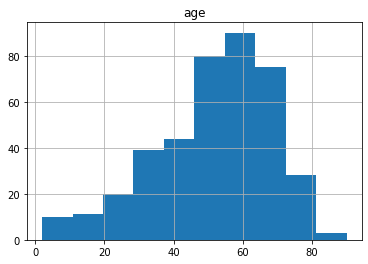

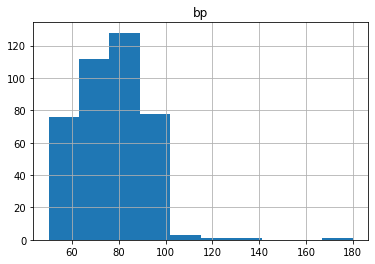

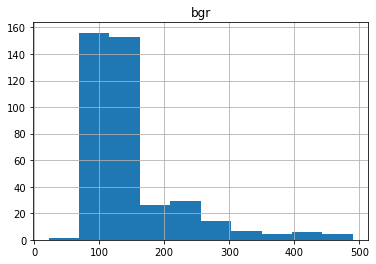

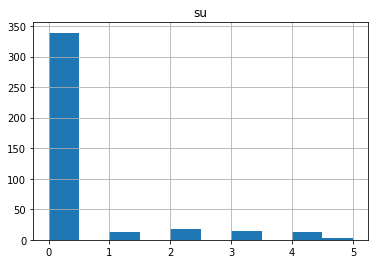

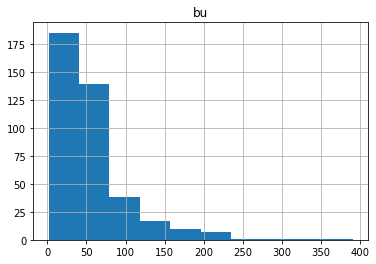

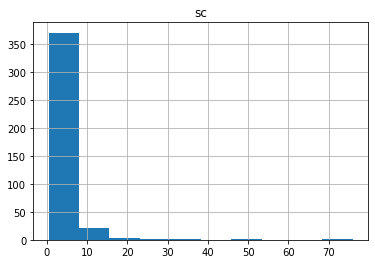

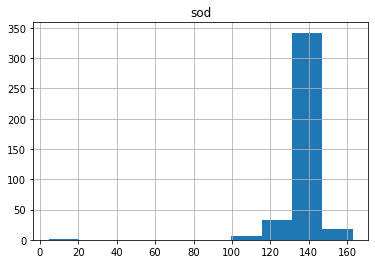

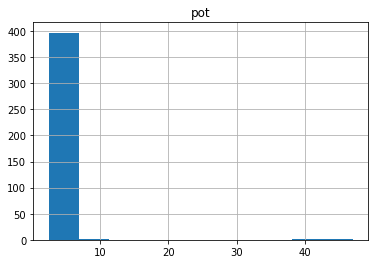

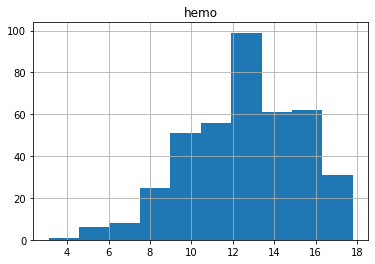

In [21]:
for i in data1.columns:   
        data1.hist(i)

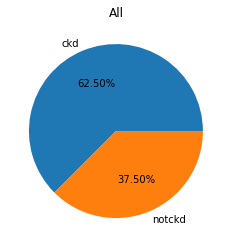

In [22]:
plot_pie('classification')

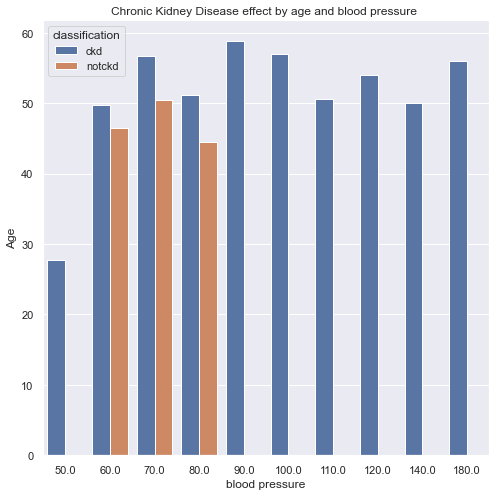

In [23]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset


# Set the figure size
plt.figure(figsize=(8, 8))

# grouped barplot
s1=sns.barplot(x="bp", y="age",hue='classification', data=data, ci=None)
s1.set_title("Chronic Kidney Disease effect by age and blood pressure ")
s1.set_xlabel("blood pressure")
s1.set_ylabel("Age");

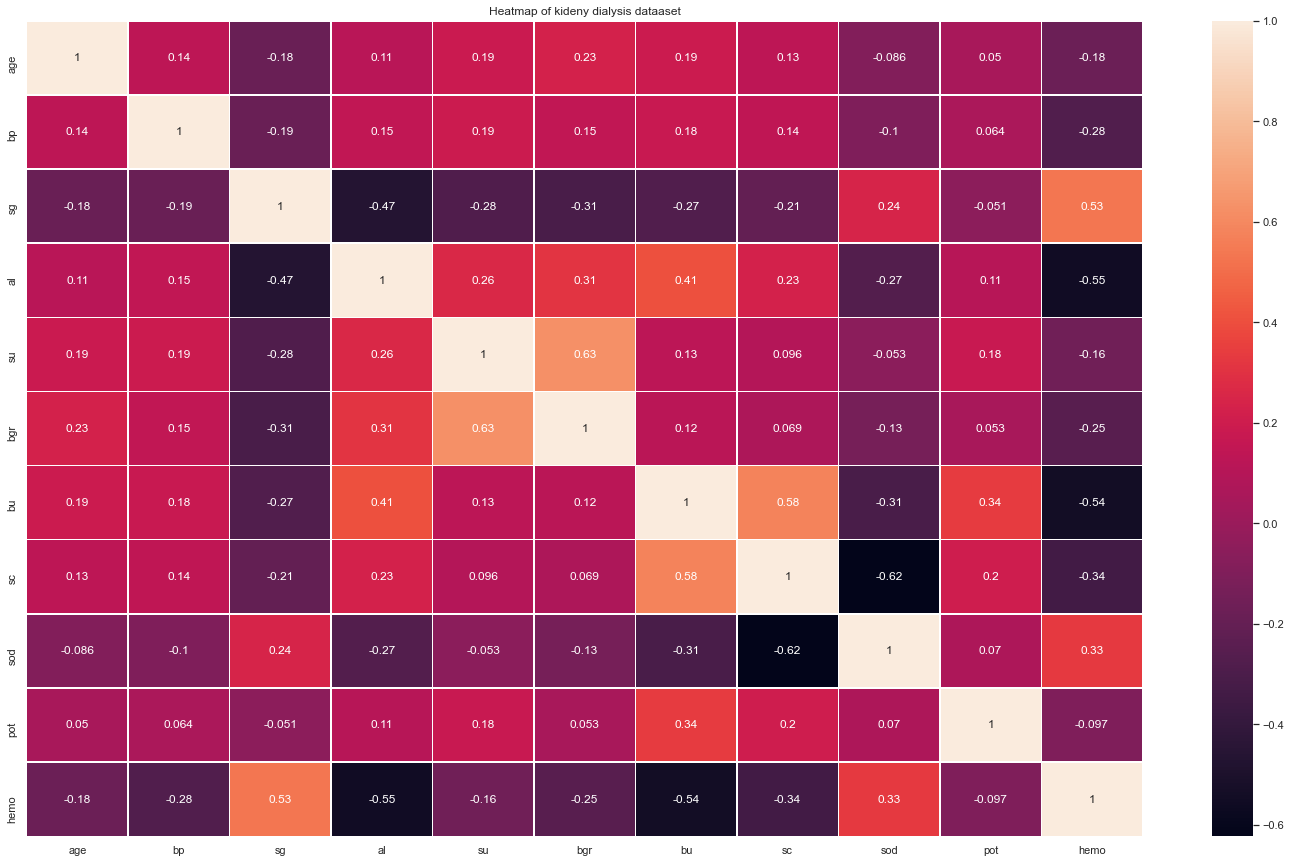

In [24]:
#find the correlation between the features 
corr_matrix = data.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr_matrix,annot=True,linewidth=0.5)
plt.title('Heatmap of kideny dialysis dataaset')
plt.show()

In [25]:
classes=['healthy','Un-healthy']

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
       # recall=recall_score(y_train, pred) 
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        sns.heatmap(confusion_matrix(y_test, pred), annot= True, cmap='YlGnBu',fmt = 'g')
        print(classification_report(y_test,pred))
        cm=(confusion_matrix(y_test,pred))
       # ax.xaxis.set_label_position('top')
        plt.tight_layout()
        plt.title('Confusion matrix', y = 1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()
        total = sum(sum(cm))
        acc = (cm[0, 0] + cm[1, 1]) / total
        sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
        specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
       # print(cm)

        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)

        FP = FP.astype(float)
        FN = FN.astype(float)
        TP = TP.astype(float)
        TN = TN.astype(float)

        # Sensitivity, hit rate, recall, or true positive rate
        TPR = TP/(TP+FN)
        print('Sensitivity (TPR) : ',TPR)
        # Specificity or true negative rate
        TNR = TN/(TN+FP) 
        print('Specificity (TNR) : ',TNR)
        # Overall accuracy
        print(" Overall accuracy")
        ACC = (TP+TN)/(TP+FP+FN+TN)
        print('Accuracy : ',ACC)
        print("Accuracy: {:.4f}".format(acc))
        print("Average Sensitivity: {:.4f}".format(sensitivity))
        print("Average Specificity: {:.4f}".format(specificity))
        print('\n')
        
        conf_matrix=cm
        print("=========================================")
        # save confusion matrix and slice into four pieces
        TP = conf_matrix[1][1]
        TN = conf_matrix[0][0]
        FP = conf_matrix[0][1]
        FN = conf_matrix[1][0]
        print('True Positives:', TP)
        print('True Negatives:', TN)
        print('False Positives:', FP)
        print('False Negatives:', FN)

        # calculate accuracy
        conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

        # calculate mis-classification
        conf_misclassification = 1- conf_accuracy

        # calculate the sensitivity
        conf_sensitivity = (TP / float(TP + FN))
        # calculate the specificity
        conf_specificity = (TN / float(TN + FP))

        # calculate precision
        conf_precision = (TN / float(TN + FP))
        # calculate f_1 score
        conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
        print('-'*50)
        print(f'Accuracy: {round(conf_accuracy,2)}') 
        print(f'Mis-Classification: {round(conf_misclassification,2)}') 
        print(f'Sensitivity: {round(conf_sensitivity,2)}') 
        print(f'Specificity: {round(conf_specificity,2)}') 
        print(f'Precision: {round(conf_precision,2)}')
        print(f'f_1 Score: {round(conf_f1,2)}')


In [26]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(15,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')


In [27]:
#replacing the value with 0,1 

data[['htn','dm','cad','pe','ane']] = data[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
data[['rbc','pc']] = data[['rbc','pc']].replace(to_replace={'abnormal':1,'normal':0})
data[['pcc','ba']] = data[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
data[['appet']] = data[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
data['classification'] = data['classification'].replace(to_replace={'ckd':1.0,'\t?':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

data.rename(columns={'classification':'class'},inplace=True)

data['pe'] = data['pe'].replace(to_replace='good',value=0) 
data['appet'] = data['appet'].replace(to_replace='no',value=0)
data['cad'] = data['cad'].replace(to_replace='\tno',value=0)
data['dm'] = data['dm'].replace(to_replace={'\tno':0,'\tyes':1,'\t?':1.0,' yes':1, '':np.nan})

data[['pcv','rc']] = data[['pcv','rc']].replace(to_replace = {'\t?':1.0})
data[['wc']] = data[['wc']].replace(to_replace = {'\t6200':6200,'\t8400':8400,'\t?':1.0})

# Random forest classifier

In [28]:
X = data.drop('class', axis=1)
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7,random_state=100)

clf=RandomForestClassifier(n_estimators=10)

In [29]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [30]:
random_accuracy = metrics.accuracy_score(y_test, y_pred)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[44  0]
 [ 0 76]]

Test Result:
Accuracy Score: 97.50%
_______________________________________________
Classification Report:	Precision Score: 98.83%
			Recall Score: 97.13%
			F1 score: 97.97%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       106
         1.0       0.99      0.97      0.98       174

    accuracy                           0.97       280
   macro avg       0.97      0.98      0.97       280
weighted avg       0.98      0.97      0.98       280



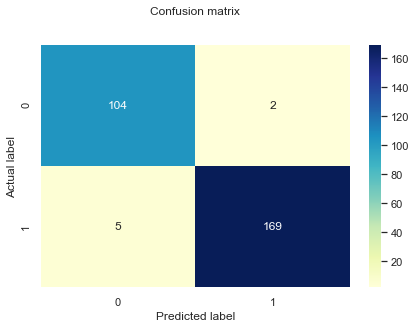

Sensitivity (TPR) :  [0.98113208 0.97126437]
Specificity (TNR) :  [0.97126437 0.98113208]
 Overall accuracy
Accuracy :  [0.975 0.975]
Accuracy: 0.9750
Average Sensitivity: 0.9811
Average Specificity: 0.9713


True Positives: 169
True Negatives: 104
False Positives: 2
False Negatives: 5
--------------------------------------------------
Accuracy: 0.97
Mis-Classification: 0.03
Sensitivity: 0.97
Specificity: 0.98
Precision: 0.98
f_1 Score: 0.98


In [31]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)

# KNN

In [32]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

In [33]:
print(classification_report(y_test,pred))

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

knn_acc = accuracy_score( y_test,pred)

              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       106
         1.0       0.80      0.71      0.75       174

    accuracy                           0.71       280
   macro avg       0.70      0.71      0.70       280
weighted avg       0.72      0.71      0.71       280



Train Result:
Accuracy Score: 83.33%
_______________________________________________
Classification Report:	Precision Score: 91.18%
			Recall Score: 81.58%
			F1 score: 86.11%
_______________________________________________
Confusion Matrix: 
 [[38  6]
 [14 62]]

Test Result:
Accuracy Score: 71.07%
_______________________________________________
Classification Report:	Precision Score: 80.00%
			Recall Score: 71.26%
			F1 score: 75.38%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.60      0.71      0.65       106
         1.0       0.80      0.71      0.75       174

    accuracy                           0.71       280
   macro avg       0.70      0.71      0.70       280
weighted avg       0.72      0.71      0.71       280



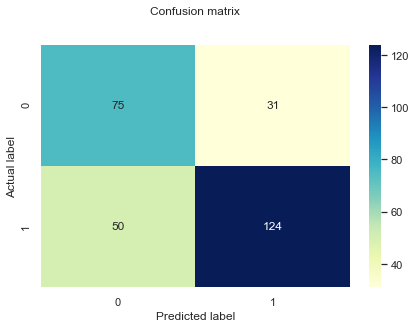

Sensitivity (TPR) :  [0.70754717 0.71264368]
Specificity (TNR) :  [0.71264368 0.70754717]
 Overall accuracy
Accuracy :  [0.71071429 0.71071429]
Accuracy: 0.7107
Average Sensitivity: 0.7075
Average Specificity: 0.7126


True Positives: 124
True Negatives: 75
False Positives: 31
False Negatives: 50
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.71
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.71


In [34]:
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

# Decision Tree Classifier

In [35]:
tree = DecisionTreeClassifier(random_state=100)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [36]:
dtc_acc = accuracy_score(y_test, tree.predict(X_test))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[44  0]
 [ 0 76]]

Test Result:
Accuracy Score: 91.79%
_______________________________________________
Classification Report:	Precision Score: 90.81%
			Recall Score: 96.55%
			F1 score: 93.59%
_______________________________________________
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       106
         1.0       0.91      0.97      0.94       174

    accuracy                           0.92       280
   macro avg       0.92      0.90      0.91       280
weighted avg       0.92      0.92      0.92       280



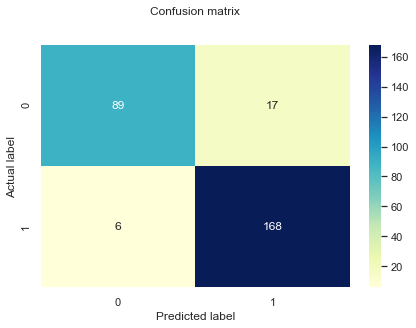

Sensitivity (TPR) :  [0.83962264 0.96551724]
Specificity (TNR) :  [0.96551724 0.83962264]
 Overall accuracy
Accuracy :  [0.91785714 0.91785714]
Accuracy: 0.9179
Average Sensitivity: 0.8396
Average Specificity: 0.9655


True Positives: 168
True Negatives: 89
False Positives: 17
False Negatives: 6
--------------------------------------------------
Accuracy: 0.92
Mis-Classification: 0.08
Sensitivity: 0.97
Specificity: 0.84
Precision: 0.84
f_1 Score: 0.9


In [37]:
print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

# SVM

In [38]:
svm_model = SVC(kernel='rbf', gamma=0.1, probability=True)
svm_model.fit(X_train, y_train)

SVC(gamma=0.1, probability=True)

In [39]:
sev_pred = accuracy_score(y_test, svm_model.predict(X_test))

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[44  0]
 [ 0 76]]

Test Result:
Accuracy Score: 62.14%
_______________________________________________
Classification Report:	Precision Score: 62.14%
			Recall Score: 100.00%
			F1 score: 76.65%
_______________________________________________


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       106
         1.0       0.62      1.00      0.77       174

    accuracy                           0.62       280
   macro avg       0.31      0.50      0.38       280
weighted avg       0.39      0.62      0.48       280



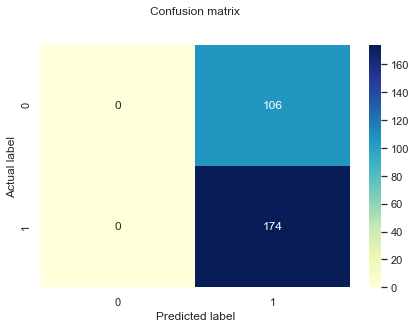

Sensitivity (TPR) :  [0. 1.]
Specificity (TNR) :  [1. 0.]
 Overall accuracy
Accuracy :  [0.62142857 0.62142857]
Accuracy: 0.6214
Average Sensitivity: 0.0000
Average Specificity: 1.0000


True Positives: 174
True Negatives: 0
False Positives: 106
False Negatives: 0
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.0
f_1 Score: 0.0


In [40]:
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

# MLPClassifier

In [41]:
NN=MLPClassifier(hidden_layer_sizes=(10,50),momentum=0.9,solver='sgd',random_state=100)
               
NN.fit(X_train, y_train)

mlp_pred = accuracy_score(y_test, NN.predict(X_test))




Train Result:
Accuracy Score: 63.33%
_______________________________________________
Classification Report:	Precision Score: 63.33%
			Recall Score: 100.00%
			F1 score: 77.55%
_______________________________________________
Confusion Matrix: 
 [[ 0 44]
 [ 0 76]]

Test Result:
Accuracy Score: 62.14%
_______________________________________________
Classification Report:	Precision Score: 62.14%
			Recall Score: 100.00%
			F1 score: 76.65%
_______________________________________________


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       106
         1.0       0.62      1.00      0.77       174

    accuracy                           0.62       280
   macro avg       0.31      0.50      0.38       280
weighted avg       0.39      0.62      0.48       280



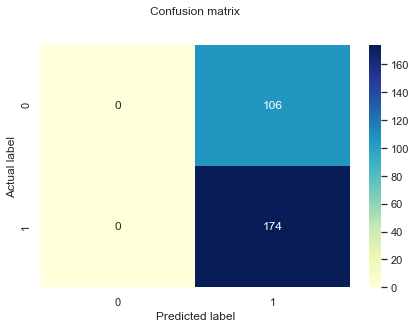

Sensitivity (TPR) :  [0. 1.]
Specificity (TNR) :  [1. 0.]
 Overall accuracy
Accuracy :  [0.62142857 0.62142857]
Accuracy: 0.6214
Average Sensitivity: 0.0000
Average Specificity: 1.0000


True Positives: 174
True Negatives: 0
False Positives: 106
False Negatives: 0
--------------------------------------------------
Accuracy: 0.62
Mis-Classification: 0.38
Sensitivity: 1.0
Specificity: 0.0
Precision: 0.0
f_1 Score: 0.0


In [42]:
print_score(NN, X_train, y_train, X_test, y_test, train=True)
print_score(NN, X_train, y_train, X_test, y_test, train=False)

## list of each model with there respective accuracy score 

In [43]:
models = pd.DataFrame({'Model' : [ 'Random Forest Model', 'KNN','Decision Tree Classifier','SVM', 'MLP'],
                       'Score' : [ random_accuracy,knn_acc,dtc_acc,sev_pred,mlp_pred]})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Random Forest Model,0.975000
2,Decision Tree Classifier,0.917857
1,KNN,0.710714
3,SVM,0.621429
4,MLP,0.621429


### finalizing the random forest model

In [44]:
import pickle
filename = 'final_model.pkl'
pickle.dump(clf, open(filename, 'wb'))

### Testing the model with demo data 

In [45]:
dt = {'age':[50], 'bp':[90], 'sg':[1.03], 'al':[4], 'rbc':[0], 'su':[2], 'pc':[0], 'pcc':[1], 'ba':[0], 'bgr':[106], 'bu':[56],
       'sc':[2.7], 'sod':[142], 'pot':[3.4], 'hemo':[10.8], 'pcv':[16], 'wc':[9600], 'rc':[3.8], 'htn':[1], 'dm':[0], 'cad':[0],
       'appet':[1], 'pe':[1], 'ane':[0]}

data_preds = pd.DataFrame(dt)

In [46]:
data_preds.head()

,age,bp,sg,al,rbc,su,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,50,90,1.03,4,0,2,0,1,0,106,...,10.8,16,9600,3.8,1,0,0,1,1,0


In [47]:
y_pred=clf.predict(data_preds)

In [48]:
label = {0:"no risk",1:"risk"}
label[y_pred[0]]

'risk'